# Tutorial <span style='color:red'>?</span>: Small Angle Neutron Scattering Rocking Curve

## SANS Reference frame

There are common scattering geometries defined in SANS, namely with a magnetic field applied to the incoming neutron beam in either a perpendicular or and parallel geometry. 

**Perpendicular geometry**: the magnetic field is applied along the $z$ direction while the incoming neutron beam propagates along the $x$ direction.

**Parallel geometry**: both the magnetic field and the incoming neutron beam are along the $z$ direction.

When computing SANS, one has to be careful that the coordinate axes and applied magnetic field direction that are used for the micromagnetic simulation matches that of the desired SANS geometry. If this is not the case then rotations of the micromagnetic object should be performed so that coordinate axes are congruent with the desired scattering geometry. 

<img src="Figures/SANS.png" width="900" height="600">

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import ubermagutil.units as uu
import mag2exp

In [ ]:
region = df.Region(p1=(-20e-9, -20e-9, -8e-9), p2=(20e-9, 20e-9, 8e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

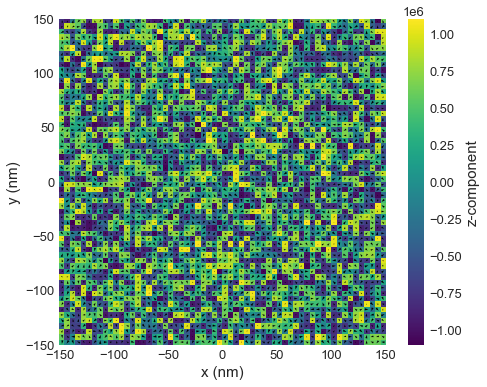

In [3]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import ubermagutil.units as uu
region = df.Region(p1=(-150e-9, -150e-9, 0), p2=(150e-9, 150e-9, 20e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=1.6e-11)
                 + mm.DMI(D=4e-3, crystalclass='T') 
                 + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) 
                 + mm.Demag()
                 + mm.Zeeman(H=(0, 0, 2e5)))

Ms = 1.1e6

def m_fun(pos):
    return 2 * np.random.rand(3) - 1
# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_fun, norm=Ms)
system.m.plane('z').mpl()

Running OOMMF (DockerOOMMFRunner) [2021/08/26 15:34]... (12.8 s)


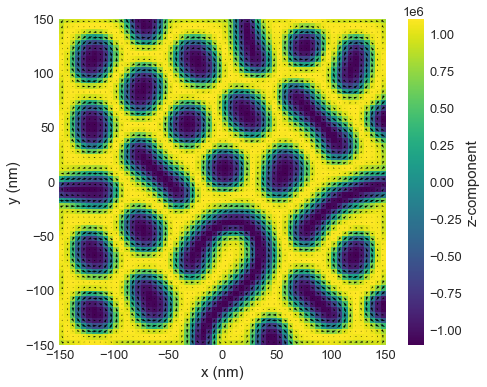

In [4]:
# NBVAL_IGNORE_OUTPUT
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [5]:
%matplotlib notebook
import mag2exp

In [7]:
cross_section.real.array.argmax()
idx = np.unravel_index(cross_section.real.array.argmax(), cross_section.real.array.shape)
idx = np.array(idx)

In [11]:
point = cross_section.mesh.index2point(idx[:-1])
point[0]

13333333.333333343

In [19]:
(point[0], point[1], cross_section1.mesh.region.pmin[2] + cross_section1.mesh.dz/2)

(13333333.333333343, 16666666.666666687, 0.0)

In [20]:
field_rotator = df.FieldRotator(system.m)
val = [cross_section.real.array.max()]
ang = [np.array((0.,0.,0.))]
for i in range(10):
    field_rotator.rotate(method='from_euler', seq='y', angles=1, degrees=True)
    cross_section1 = mag2exp.sans.cross_section(field_rotator.field, method='pn', geometry='parallel')
    val.append(cross_section1.real.array[cross_section1.mesh.point2index((point[0], point[1], cross_section1.mesh.region.pmin[2] + cross_section1.mesh.dz/2))][0])
    ang.append(field_rotator._rotation.as_euler('xyz', degrees=True))
ang = np.array(ang)
val = np.array(val)

<IPython.core.display.Javascript object>


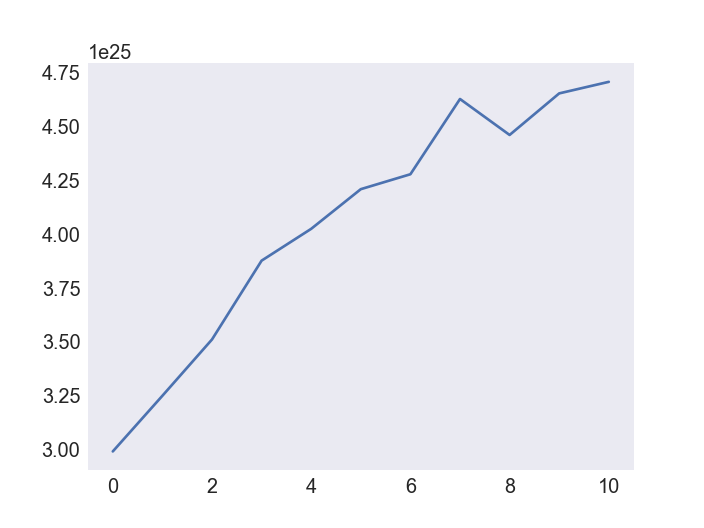

In [23]:
plt.figure()
plt.plot(ang[:,1],val)
plt.show()

<IPython.core.display.Javascript object>


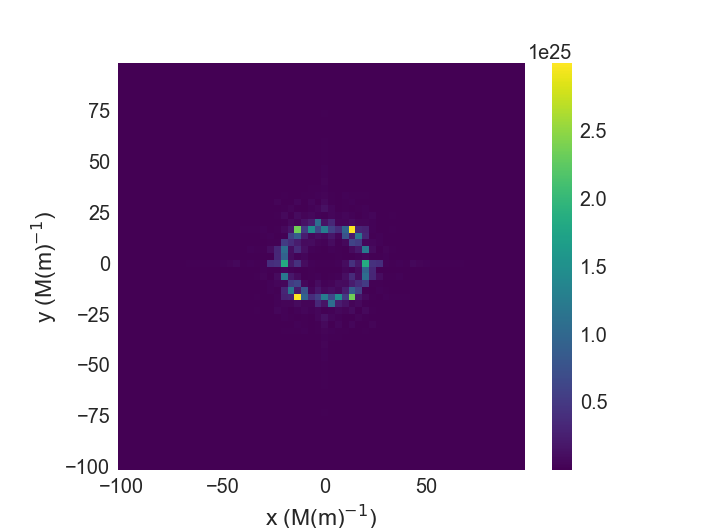

In [6]:
cross_section = mag2exp.sans.cross_section(system.m, method='pn', geometry='parallel')
cross_section.real.mpl.scalar()

<IPython.core.display.Javascript object>


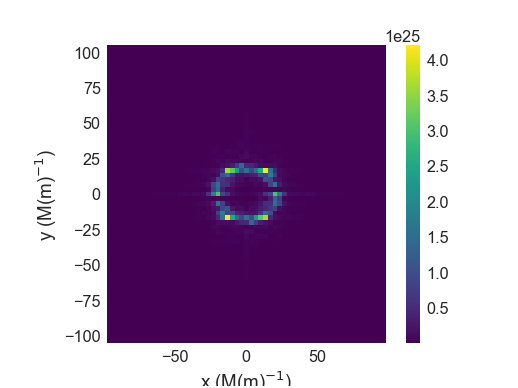

In [29]:
field_rotator = df.FieldRotator(system.m)
field_rotator.rotate(method='from_euler', seq='y', angles=5, degrees=True)
cross_section1 = mag2exp.sans.cross_section(field_rotator.field, method='pn', geometry='parallel')
cross_section1.real.mpl.scalar()

In [99]:
point

(-18661571.08978173, 4444444.444444448, 94294664.73093605)

In [22]:
import matplotlib.pyplot as plt